# Курс аналитик данных на Python
## Модуль 7.2 А/Б-тестирование с помощью Python. Параметрические оценки.

In [1]:
import sys
sys.version

'3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]'

In [2]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/

import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
# import dash, jupyter_dash #https://plot.ly/

%matplotlib inline 

import warnings
warnings.simplefilter('ignore') #Здесь мы будем игнорировать предупреждения о грядущих изменениях вызовов sc.stats и прочего

**$H_0$** -- основная гипотеза, $\mathcal{F} = \mathcal{F_0}$  
**$H_1$** -- альтернативная гипотеза $\mathcal{F} \ne \mathcal{F_0}$

Пусть существует некоторая статистика $\rho(X)$, такая, что:  
если **$H_0$** верна, то $\rho(X)$ имеет полностью известное распределение $\mathcal{G}$,  
если **$H_0$** не верна, то $\rho(X) \stackrel{p}{\longrightarrow} \infty$.  
Пусть $\varepsilon = P(|\eta| \ge C)$  
**_Критерий согласия_** $\delta(X)$:  
$\delta(X) = H_0, |\rho(X)| < C$,  
$\delta(X) = H_1, |\rho(X)| \ge C$.

**_Критерий согласия $\chi^2$ (Пирсона)_** 

##### Задача
Мы вышли на улицу в городе.
Стали считать встречающихся мужчин и женщин до 1000. При этом нам встретилось 589 женщин и 411 мужчин.
Можем ли мы сказать, что количество мужчин и женщин в городе одинаково?

$H_0$: количество мужчин и женщин строго одинаково; вероятность того, что случайный встреченный человек является мужчиной = 0.5  
$H_1$: вероятности не равны.

In [3]:
N = 1000
females = 589
males = N - females
observed = [females, males]
expected = [N/2, N/2]
sc.stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=31.684, pvalue=1.8141062046967345e-08)

In [4]:
N = 1000
females = 800
males = N - females
observed = [females, males]
expected = [N/2, N/2]
sc.stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=360.0, pvalue=2.8156843046193504e-80)

In [5]:
N = 1000
females = 500
males = N - females
observed = [females, males]
expected = [N/2, N/2]
sc.stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

<tbody>
<tr><th>
<td> </td>
<td>наблюдались побочные эффекты</td>
<td>не наблюдались побочные эффекты</td>
<td>всего</td>
</th></tr>
<tr><th>
<td>плацебо</td>
<td>15</td>
<td>47</td>
<td>62</td>
</th></tr>
<tr><th>
<td>препарат</td>
<td>28</td>
<td>31</td>
<td>59</td>
</th></tr>
<tr><th>
<td>всего</td>
<td>43</td>
<td>78</td>
<td>121</td>
</th></tr>
</tbody>

$H_0$: наблюдения побочных эффектов совершенно случайны и не связаны с действием препарата.  
$H_1$: наблюдения не случайны.

In [6]:
observed1 = [15, 47]
observed2 = [28, 31]
data = np.array([observed1, observed2])
sc.stats.chi2_contingency(data)

Chi2ContingencyResult(statistic=6.162860813801885, pvalue=0.013046004363013213, dof=1, expected_freq=array([[22.03305785, 39.96694215],
       [20.96694215, 38.03305785]]))

In [7]:
observed1 = [15, 85]
observed2 = [40, 63]
data = np.array([observed1, observed2])
sc.stats.chi2_contingency(data)

Chi2ContingencyResult(statistic=13.411050985782776, pvalue=0.0002501462216232241, dof=1, expected_freq=array([[27.09359606, 72.90640394],
       [27.90640394, 75.09359606]]))

**_Критерий Стьюдента_** 

Известно, что:  
$X \sim \mathcal{N}(a_x, \sigma^2)$  
$Y \sim \mathcal{N}(a_y, \sigma^2)$  
$H_0: a_x = a_y$

**NB**  
Везде, где нормальность данных предусматривается критерием как условие применимости, неплохо бы её проверить :)

##### Задача
Меряем рост у женщин в городе.

In [8]:
N = 100
N_half = int(N/2)
female_height = np.concatenate([np.random.normal(180, 2, N_half), np.random.normal(160, 2, N_half)])

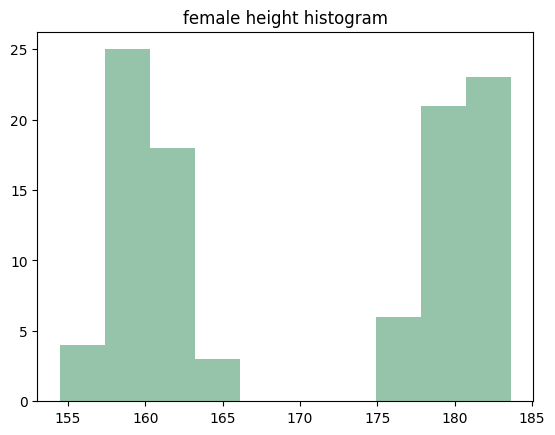

In [9]:
plt.hist(female_height, color='seagreen', alpha=0.5)
plt.title('female height histogram')
plt.show()

In [10]:
expected_mean_height = 170

In [11]:
sc.stats.ttest_1samp(female_height, expected_mean_height)

TtestResult(statistic=0.01653255525060038, pvalue=0.9868428030330565, df=99)

##### Задача
Пусть мы измерили рост случайных прохожих женщин и мужчин, по 100 человек.  
Вопрос, есть ли существенные различия в среднем росте?

In [12]:
N = 100
female_height = np.random.normal(165, 5, N)
male_height = np.random.normal(180, 5, N)

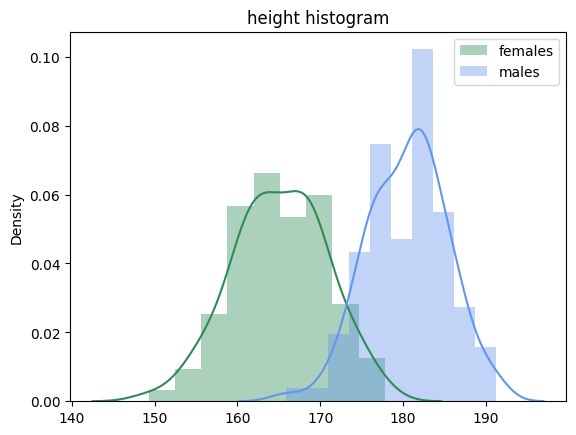

In [13]:
sns.distplot(female_height, color='seagreen', label='females')
sns.distplot(male_height, color='cornflowerblue', label='males')
plt.title('height histogram')
plt.legend()
plt.show()

In [14]:
# Внимание! 
# The test measures whether the average (expected) value differs significantly across samples. 
# If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. 
expected_mean_height = 165
sc.stats.ttest_1samp(female_height, expected_mean_height)

TtestResult(statistic=0.17967938069947473, pvalue=0.8577715335784972, df=99)

In [15]:
expected_mean_height = 180
sc.stats.ttest_1samp(female_height, expected_mean_height)

TtestResult(statistic=-26.27360478185238, pvalue=2.004049409714243e-46, df=99)

In [16]:
sc.stats.ttest_ind(a=female_height, b=male_height)

Ttest_indResult(statistic=-20.826459838041934, pvalue=8.916305347890398e-52)

**_Критерий Фишера_** 

Известно, что:  
$X \sim \mathcal{N}(a_x, \sigma_x^2)$  
$Y \sim \mathcal{N}(a_y, \sigma_y^2)$  
$H_0: \sigma_x^2 = \sigma_y^2$

##### Задача
Есть две партии одинакового мороженого с двух разных заводов, которые изготовлялись на разном оборудовании.  
Мы измеряем вес мороженого. Есть ли различия в точности оборудования?

In [17]:
N = 10
ice_cream1 = np.random.normal(50, 5, N)
ice_cream2 = np.random.normal(50, 10, N)

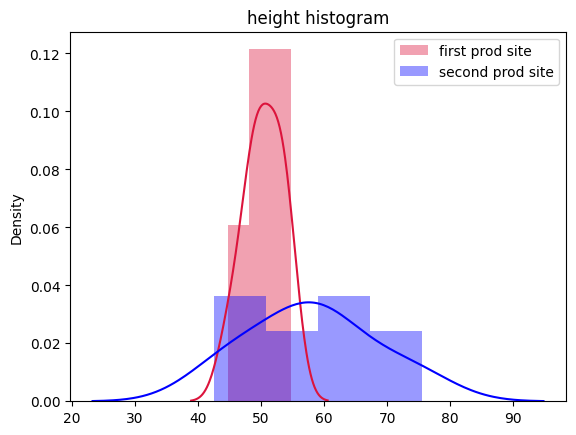

In [18]:
sns.distplot(ice_cream1, color='crimson', label='first prod site')
sns.distplot(ice_cream2, color='blue', label='second prod site')
plt.title('height histogram')
plt.legend()
plt.show()

In [19]:
# Вычислим F: отношение дисперсий
F = ice_cream1.var(ddof=1) / ice_cream2.var(ddof=1)
# степени свободы
df1 = len(ice_cream1) - 1
df2 = len(ice_cream2) - 1
p_value = sc.stats.f.cdf(F, df1, df2) # получаем p-value из функции распределения для нашей случайной величины F
print('p-value: {:.10f}'.format(p_value))

p-value: 0.0007926060


In [20]:
N = 100
ice_cream1 = np.random.normal(50, 5, N)
ice_cream2 = np.random.normal(50, 10, N)

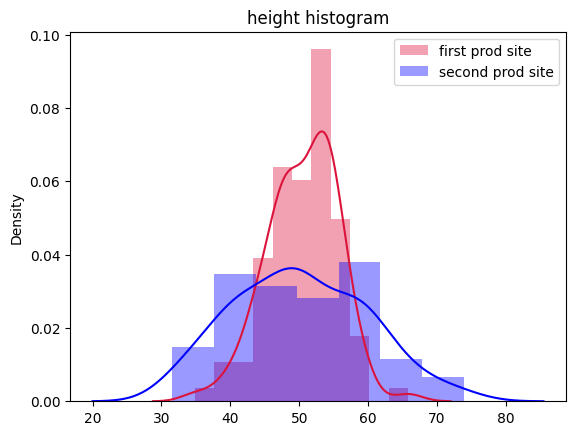

In [21]:
sns.distplot(ice_cream1, color='crimson', label='first prod site')
sns.distplot(ice_cream2, color='blue', label='second prod site')
plt.title('height histogram')
plt.legend()
plt.show()

In [22]:
# Вычислим F: отношение дисперсий
F = ice_cream1.var(ddof=1) / ice_cream2.var(ddof=1)
# степени свободы
df1 = len(ice_cream1) - 1
df2 = len(ice_cream2) - 1
p_value = sc.stats.f.cdf(F, df1, df2) # получаем p-value из функции распределения для нашей случайной величины F
print('p-value: {:.10f}'.format(p_value))

p-value: 0.0000000004


Вернёмся к примеру с побочными эффектами.  

<tbody>
<tr><th>
<td> </td>
<td>наблюдались побочные эффекты</td>
<td>не наблюдались побочные эффекты</td>
<td>всего</td>
</th></tr>
<tr><th>
<td>плацебо</td>
<td>15</td>
<td>47</td>
<td>62</td>
</th></tr>
<tr><th>
<td>препарат</td>
<td>28</td>
<td>31</td>
<td>59</td>
</th></tr>
<tr><th>
<td>всего</td>
<td>43</td>
<td>78</td>
<td>121</td>
</th></tr>
</tbody>

$H_0$: выборки принадлежат одному и тому же распределению.  
$H_1$: всё остальное.

In [23]:
table_a = np.array([[15, 47], [28, 31]])

In [24]:
ratio, p_value = sc.stats.fisher_exact(table_a)
print('p-value: {:.10f}'.format(p_value))

p-value: 0.0084610194
